In [1]:
# Diabetes Case Study

In [2]:
"""machine learning workflow
PLEDETF
1. Problem Definition
2. Load the packages
3. Exploratory Data analysis
4. Data Cleaning
5. Model Evaluation
6. Model Tuning
7. Finalize the model
"""

'machine learning workflow\nPLEDETF\n1. Problem Definition\n2. Load the packages\n3. Exploratory Data analysis\n4. Data Cleaning\n5. Model Evaluation\n6. Model Tuning\n7. Finalize the model\n'

In [3]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for univariate and multicolinearity analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import phik

# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# metrics libraries
from sklearn.metrics import accuracy_score, RocCurveDisplay, confusion_matrix

# libraries for model selection and crossvalidation
from sklearn.model_selection import train_test_split, GridSearchCV


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/zobekenobe/Files/main/diabetes.csv')

In [5]:
# check the shape of the data
df.shape

(768, 9)

In [6]:
# check the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# check the statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# observations


In [9]:
# check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


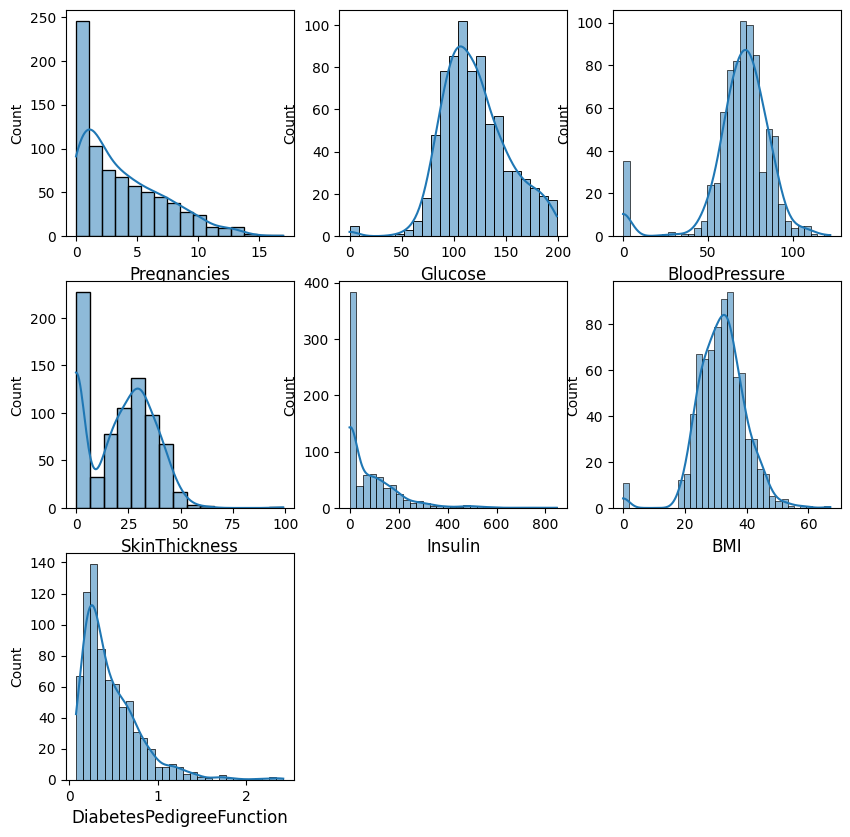

In [11]:
# checking the distribution of the data
plt.figure(figsize = (10,10))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber < len(df.columns[:-1]):
        plt.subplot(3,3,plotnumber)
        sns.histplot(df[col], kde = True)
        plt.xlabel(col, fontsize = 12)
        plotnumber +=1
plt.show()

observation 1: the features Glucose, BloodPressure, SkinThickness, Insulin and BMI have 0 values which is incorrect hence we deal with that


observation 2: Pregrancies and DiabetesPedigreeFunction are both skewed

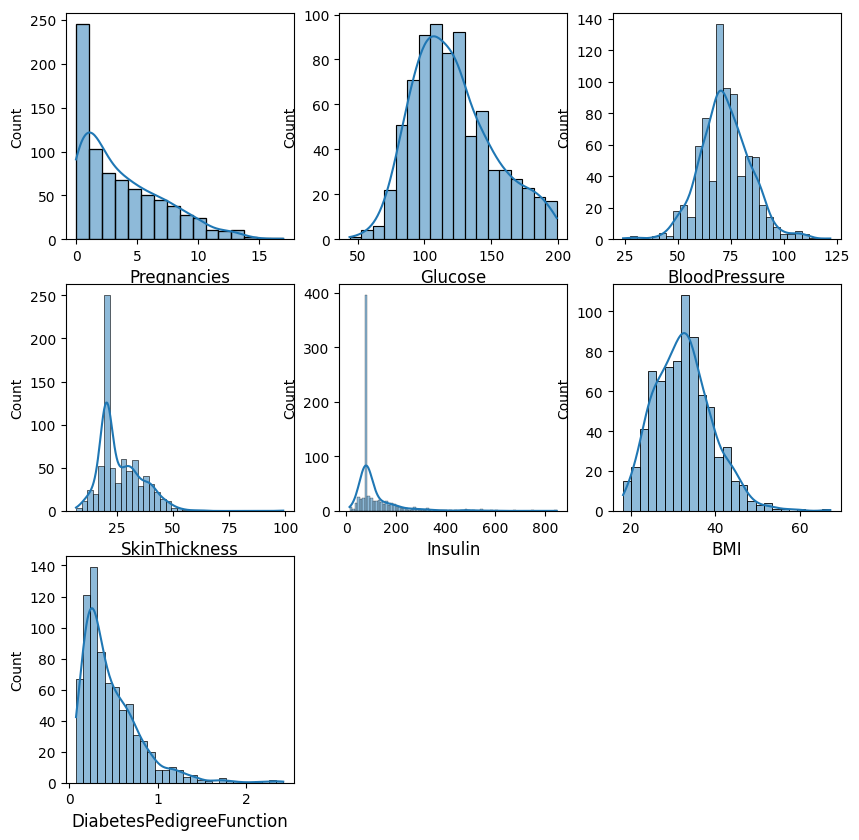

In [12]:
# dealing with observation 0 i.e. replacing the zero values with the mean of the data
columns_with_zero = ['Glucose',
                     'BloodPressure',
                     'SkinThickness',
                     'Insulin',
                     'BMI']
for col in columns_with_zero:
    df[col] = df[col].replace(0, df[col].mean())
    
# checking the distribution after removing the zeros from the requistite columns
plt.figure(figsize = (10, 10))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber < len(df.columns[:-1]):
        plt.subplot(3,3,plotnumber)
        sns.histplot(df[col], kde = True)
        plt.xlabel(col, fontsize = 12)
        plotnumber+=1
plt.show()

the data looks more normally distribution

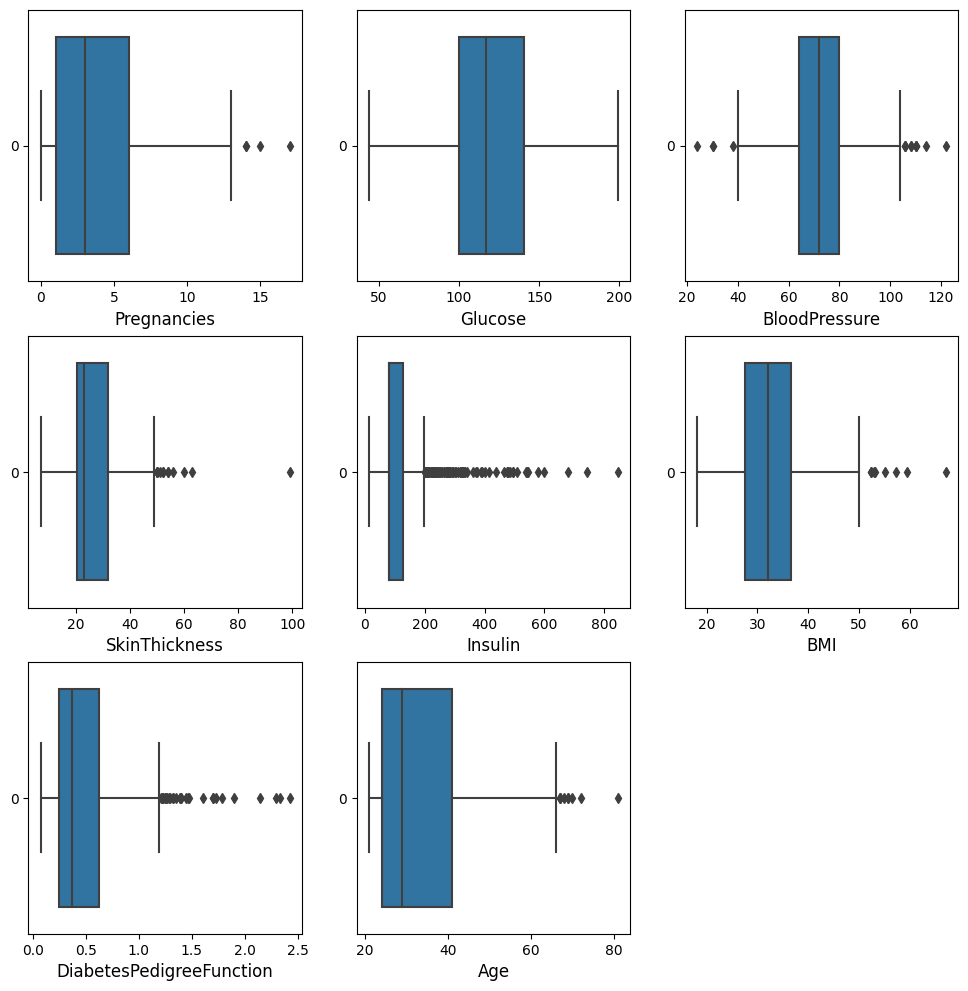

In [13]:
# checking for outliers
plt.figure(figsize = (12, 12))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber<= len(df.columns[:-1]):
        plt.subplot(3,3,plotnumber)
        sns.boxplot(data = df[col], orient = 'h')
        plt.xlabel(col, fontsize = 12)
    plotnumber += 1
plt.show()

In [14]:
# removing the outliers using the IQR (inter quantile range)

q1 = df.iloc[:,:-1].quantile(0.25)
q3 = df.iloc[:,:-1].quantile(0.75)

In [15]:
IQR = q3-q1

In [16]:
# Columns with outliers higher than the IQR : All but Glucose
# Columns with outliers lower than the IQR : BloopPressure
# Columns without any outliers : Glucose

In [17]:
hi = q3 + 1.5 * IQR
lo = q1 - 1.5 * IQR
print(hi)
print(lo)

Pregnancies                  13.500000
Glucose                     201.000000
BloodPressure               104.000000
SkinThickness                49.195312
Insulin                     198.425781
BMI                          50.250000
DiabetesPedigreeFunction      1.200000
Age                          66.500000
dtype: float64
Pregnancies                 -6.500000
Glucose                     39.000000
BloodPressure               40.000000
SkinThickness                3.341146
Insulin                      8.623698
BMI                         13.850000
DiabetesPedigreeFunction    -0.330000
Age                         -1.500000
dtype: float64


In [18]:
columns_with_outliers = list(set(df.columns) - set(['Outcome']))

In [19]:
# removing the higher side outliers
for col in columns_with_outliers:
    index = np.where(df[col] > hi[col])
    df.drop(df.index[index], inplace = True)
    df.reset_index(drop=True, inplace = True)

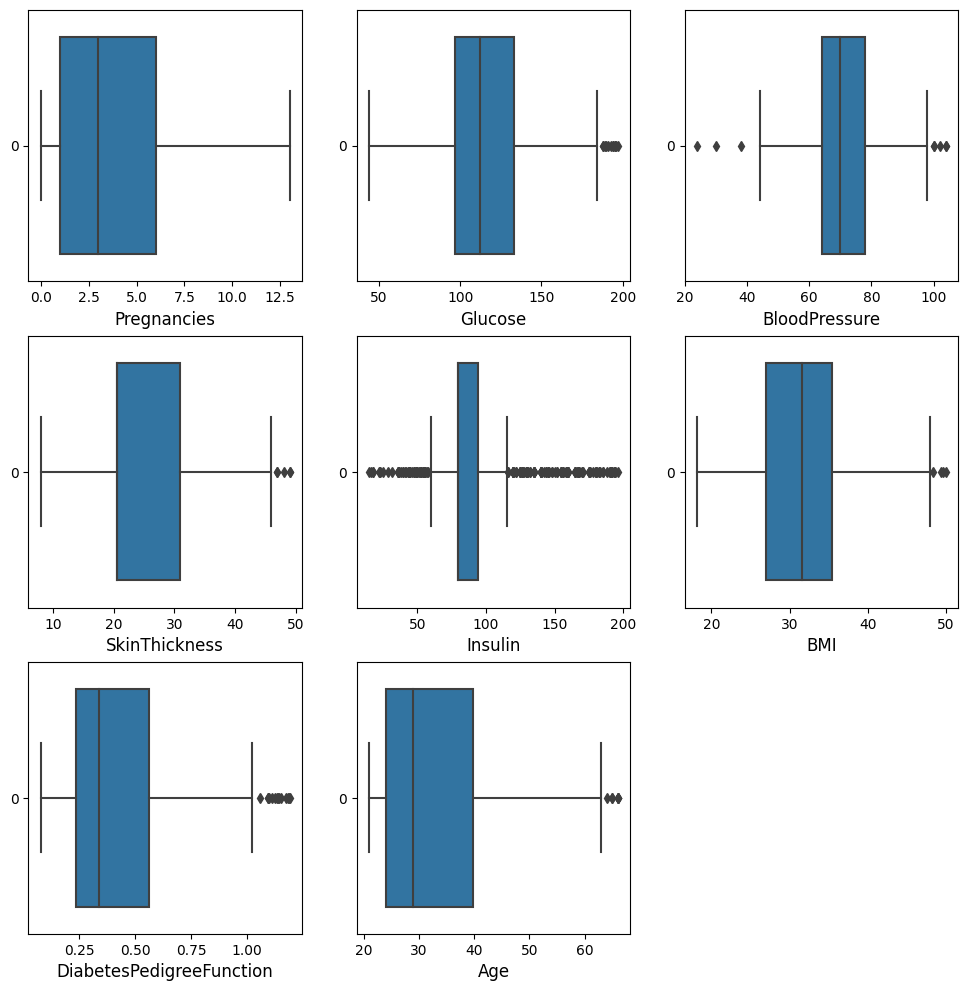

In [20]:
# checking for outliers
plt.figure(figsize = (12, 12))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber<= len(df.columns[:-1]):
        plt.subplot(3,3,plotnumber)
        sns.boxplot(data = df[col], orient = 'h')
        plt.xlabel(col, fontsize = 12)
    plotnumber += 1
plt.show()

In [21]:
# checking the shape of the dataset to know how many data points are lost
df.shape

(622, 9)

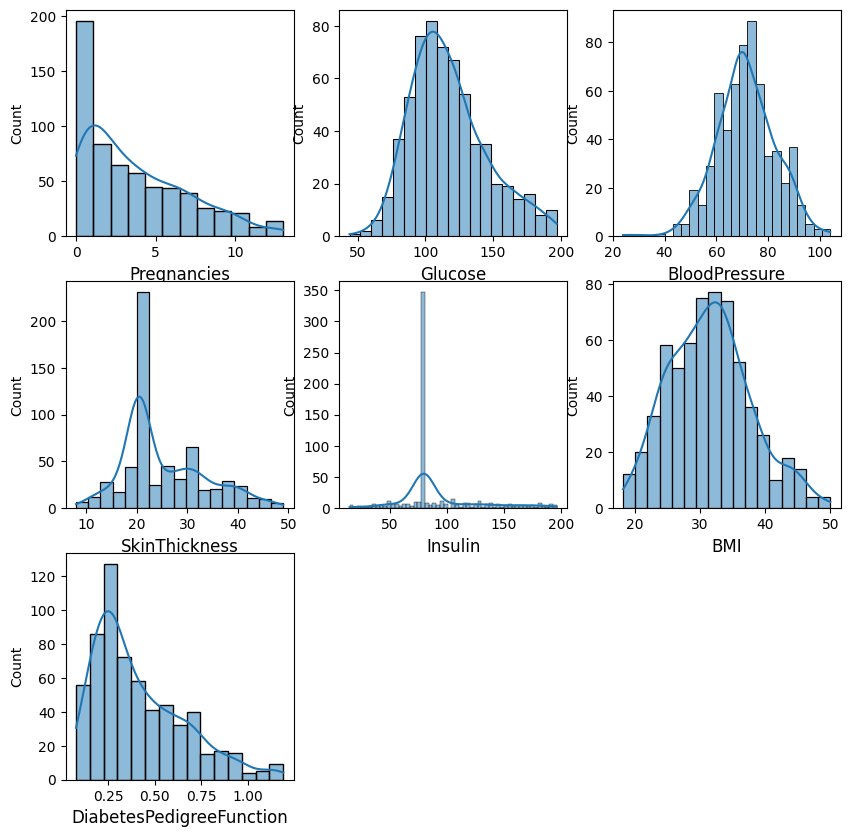

In [22]:
# checking the data distribution again
# checking the distribution after removing the zeros from the requistite columns
plt.figure(figsize = (10, 10))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber < len(df.columns[:-1]):
        plt.subplot(3,3,plotnumber)
        sns.histplot(df[col], kde = True)
        plt.xlabel(col, fontsize = 12)
        plotnumber+=1
plt.show()

In [23]:
# now checking the distribution of the outcomes column
df['Outcome'].value_counts(normalize=True)

0    0.689711
1    0.310289
Name: Outcome, dtype: float64

In [24]:
# checking for the colinear relationship between the features and the dependent variable

pvalues = []
scores  = []

for col in df.columns[:-1]:
    pvalues.append(phik.significance.significance_from_array(df[col], df['Outcome'])[0])
    scores.append(phik.phik_from_array(df[col], df['Outcome']))

In [25]:
temp = pd.DataFrame({'features' : df.columns[:-1], 'Pvalues' : pvalues, 'Scores' : scores}).set_index('features').sort_values('Scores', ascending = False)

In [26]:
temp

,Pvalues,Scores
features,,
Glucose,2.253127e-11,0.562946
Age,3.966011e-07,0.420511
BMI,6.643475e-05,0.351664
DiabetesPedigreeFunction,5.938883e-09,0.346832
Pregnancies,1.477191e-06,0.327675
Insulin,5.335446e-05,0.285369
SkinThickness,8.522934e-03,0.217407
BloodPressure,9.313751e-02,0.130327


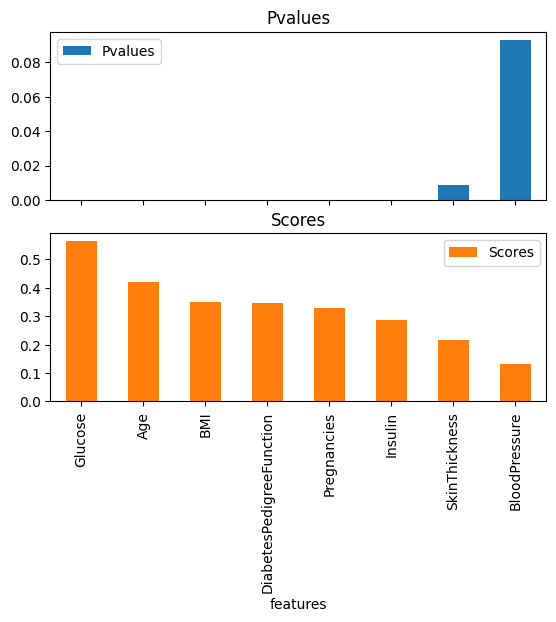

In [27]:
temp.plot(subplots = True, kind = 'bar')
plt.show()

BloopPressure though has the lowest score and higher significance it still is a relevant feature and we can't drop it

In [28]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [125]:
# First scale the data to check for multicolinearity
scaler = StandardScaler().fit(x)
xscaled = scaler.transform(x)
# Using the Variance Inflation Factor
vif = [VIF(xscaled, i) for i in range(xscaled.shape[1])]

In [126]:
pd.DataFrame({'vif score' : vif}, index=df.columns[:-1]).sort_values(by = 'vif score', ascending = False)

,vif score
Age,1.651413
Pregnancies,1.450015
BMI,1.446357
SkinThickness,1.417950
Glucose,1.252597
BloodPressure,1.247043
Insulin,1.197397
DiabetesPedigreeFunction,1.036922


Since the value of the vif scores is less than 5, hence the no two features are correlating with each other, hence we are safe to move ahead

In [38]:
# Model evaluation 
# splitting the data into its training and test data sets

xtrain, xtest, ytrain, ytest = train_test_split(xscaled, y, test_size = 0.25, random_state = 355)

In [65]:
# importing the models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model classes
lr = LogisticRegression(solver='liblinear')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn= KNeighborsClassifier()

In [66]:
# train the respective models on the training data
lr.fit(xtrain, ytrain)
dt.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

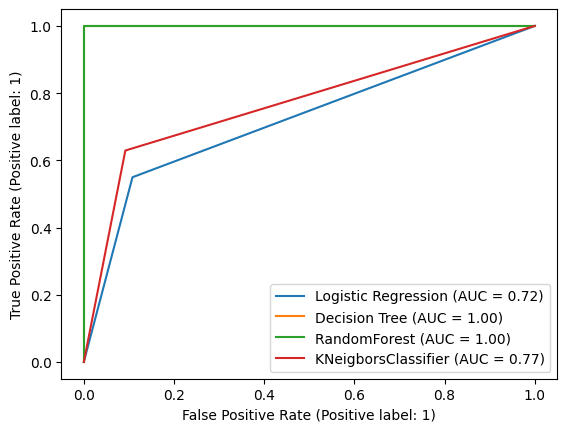

In [67]:
# checking the performance of the models on their training data using the ROC curve
fig, ax = plt.subplots()

RocCurveDisplay.from_predictions(ytrain, lr.predict(xtrain),  ax = ax, name='Logistic Regression')
RocCurveDisplay.from_predictions(ytrain, dt.predict(xtrain),  ax = ax, name='Decision Tree')
RocCurveDisplay.from_predictions(ytrain, rf.predict(xtrain),  ax = ax, name='RandomForest')
RocCurveDisplay.from_predictions(ytrain, knn.predict(xtrain), ax = ax, name='KNeigborsClassifier')
plt.show()

RandomForests and Decision Trees are overfitting the data and hence we discard them, we perform a crossvalidation on the Logistic regression model and the KNeighbours Classifier

In [77]:
gcv_lr = GridSearchCV(lr, param_grid = [{'penalty': ['l1', 'l2']}], n_jobs = -1)

In [78]:
gcv_knn= GridSearchCV(knn, param_grid = [{'n_neighbors': [3,5,7,9]}], n_jobs = -1)

In [79]:
# Training the two cross validation models
gcv_lr.fit(xtrain, ytrain)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid=[{'penalty': ['l1', 'l2']}])

In [80]:
gcv_knn.fit(xtrain, ytrain)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 5, 7, 9]}])

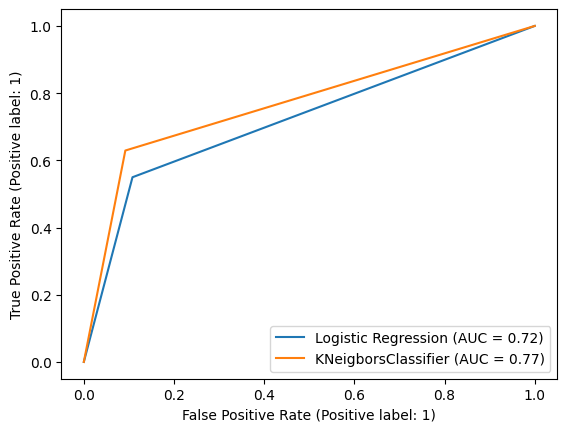

In [105]:
# checking the two models this time 
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(ytrain, gcv_lr.predict(xtrain),  ax = ax, name='Logistic Regression')
RocCurveDisplay.from_predictions(ytrain, gcv_knn.predict(xtrain), ax = ax, name='KNeigborsClassifier')
plt.show()

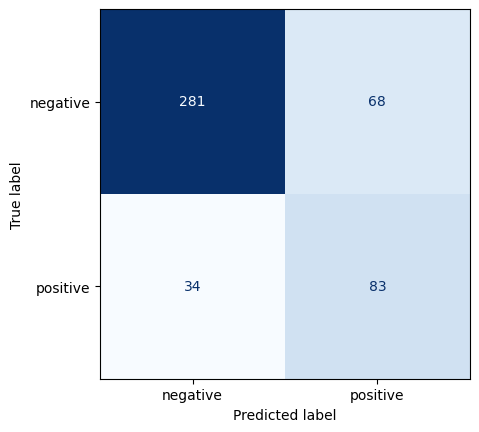

In [119]:
# checking the confusion matrix for the two models
cmd.from_predictions(lr.predict(xtrain), ytrain, cmap = 'Blues', colorbar= False, display_labels=['negative', 'positive'])
plt.show()

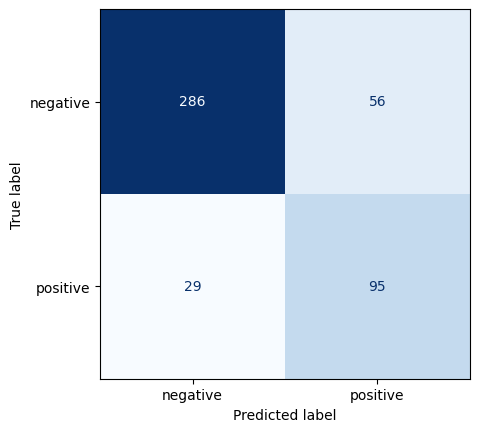

In [122]:
cmd.from_predictions(knn.predict(xtrain), ytrain, cmap = 'Blues', colorbar = False, display_labels = ['negative', 'positive'])
plt.show()

In [113]:
from sklearn.metrics import recall_score

In [123]:
print(f'Recall score for KNNClassifier : {recall_score(knn.predict(xtrain),ytrain):0.3f}')
print(f'Recall score for LogisticRegression : {recall_score(lr.predict(xtrain), ytrain):0.3f}')

Recall score for KNNClassifier : 0.766
Recall score for LogisticRegression : 0.709


In [83]:
# KNeighbors seems to be performing better hence we use this model and check for the accuracy
best_model = gcv_knn.best_estimator_

In [84]:
print(gcv_knn.best_params_)

{'n_neighbors': 5}


In [85]:
ypred = best_model.predict(xtest)

In [86]:
# checking for the accuracy score
print(accuracy_score(ypred, ytest))

0.75


In [87]:
# checking the confusion matrix
confusion_matrix(ypred, ytest)

array([[89, 14],
       [25, 28]], dtype=int64)

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

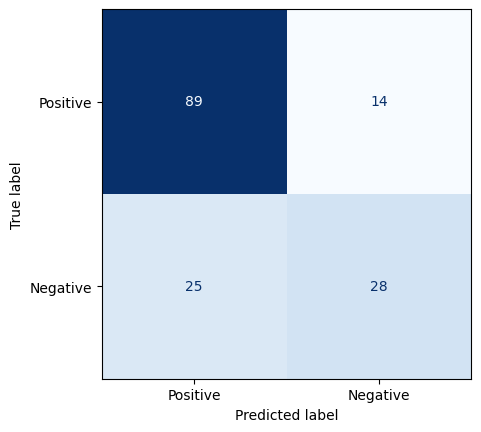

In [104]:
cmd.from_predictions(ypred, ytest, display_labels=['Positive', 'Negative'], colorbar=False, cmap='Blues')
plt.show()

In [127]:
# save the model and the Scaler Transform
import pickle
with open('diabetes.pkl', 'wb') as f:
    pickle.dump([scaler, knn], f)

In [128]:
with open('diabetes.pkl', 'rb') as f:
    data = pickle.load(f)